In [ ]:
import sys
sys.path.append("..")

In [ ]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [ ]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_5_29")
results_PQK = load_feather_folder_as_pd("../data/results/DE_0_33")
results_FQK = load_feather_folder_as_pd("../data/results/DE_5_30")
results_FQK = results_FQK[results_FQK["method"] == "FQK"]

['../data/results/DE_5_29\\0.feather', '../data/results/DE_5_29\\1.feather', '../data/results/DE_5_29\\10.feather', '../data/results/DE_5_29\\100.feather', '../data/results/DE_5_29\\101.feather', '../data/results/DE_5_29\\102.feather', '../data/results/DE_5_29\\103.feather', '../data/results/DE_5_29\\104.feather', '../data/results/DE_5_29\\105.feather', '../data/results/DE_5_29\\106.feather', '../data/results/DE_5_29\\107.feather', '../data/results/DE_5_29\\108.feather', '../data/results/DE_5_29\\11.feather', '../data/results/DE_5_29\\110.feather', '../data/results/DE_5_29\\111.feather', '../data/results/DE_5_29\\112.feather', '../data/results/DE_5_29\\113.feather', '../data/results/DE_5_29\\114.feather', '../data/results/DE_5_29\\115.feather', '../data/results/DE_5_29\\116.feather', '../data/results/DE_5_29\\117.feather', '../data/results/DE_5_29\\118.feather', '../data/results/DE_5_29\\119.feather', '../data/results/DE_5_29\\12.feather', '../data/results/DE_5_29\\120.feather', '../da

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

3.013732671737671
['../data/results/DE_0_33\\0.feather', '../data/results/DE_0_33\\1.feather', '../data/results/DE_0_33\\10.feather', '../data/results/DE_0_33\\11.feather', '../data/results/DE_0_33\\12.feather', '../data/results/DE_0_33\\13.feather', '../data/results/DE_0_33\\14.feather', '../data/results/DE_0_33\\15.feather', '../data/results/DE_0_33\\16.feather', '../data/results/DE_0_33\\17.feather', '../data/results/DE_0_33\\18.feather', '../data/results/DE_0_33\\19.feather', '../data/results/DE_0_33\\2.feather', '../data/results/DE_0_33\\20.feather', '../data/results/DE_0_33\\21.feather', '../data/results/DE_0_33\\22.feather', '../data/results/DE_0_33\\23.feather', '../data/results/DE_0_33\\24.feather', '../data/results/DE_0_33\\25.feather', '../data/results/DE_0_33\\26.feather', '../data/results/DE_0_33\\27.feather', '../data/results/DE_0_33\\28.feather', '../data/results/DE_0_33\\29.feather', '../data/results/DE_0_33\\3.feather', '../data/results/DE_0_33\\30.feather', '../data/r

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

0.29543280601501465
['../data/results/DE_5_30\\0.feather', '../data/results/DE_5_30\\1.feather', '../data/results/DE_5_30\\10.feather', '../data/results/DE_5_30\\100.feather', '../data/results/DE_5_30\\101.feather', '../data/results/DE_5_30\\102.feather', '../data/results/DE_5_30\\103.feather', '../data/results/DE_5_30\\104.feather', '../data/results/DE_5_30\\105.feather', '../data/results/DE_5_30\\106.feather', '../data/results/DE_5_30\\107.feather', '../data/results/DE_5_30\\108.feather', '../data/results/DE_5_30\\109.feather', '../data/results/DE_5_30\\11.feather', '../data/results/DE_5_30\\110.feather', '../data/results/DE_5_30\\111.feather', '../data/results/DE_5_30\\12.feather', '../data/results/DE_5_30\\13.feather', '../data/results/DE_5_30\\14.feather', '../data/results/DE_5_30\\15.feather', '../data/results/DE_5_30\\16.feather', '../data/results/DE_5_30\\17.feather', '../data/results/DE_5_30\\18.feather', '../data/results/DE_5_30\\19.feather', '../data/results/DE_5_30\\2.feath

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

0.6654996871948242


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [4]:
results_FQK.shape[0], results_PQK.shape[0], results_QNN.shape[0]

(56, 56, 215)

In [5]:
results_FQK.shape[0] + results_PQK.shape[0] + results_QNN.shape[0]

327

In [ ]:
#include an extra column called epochs, which generates and array from 0 to the number of epochs

results_PQK["epochs"] = results_PQK["loss_history"].apply(lambda x: np.arange(len(x)))
results_QNN["epochs"] = results_QNN["loss_history"].apply(lambda x: np.arange(len(x)))
results_FQK["epochs"] = results_FQK["loss_history"].apply(lambda x: np.arange(len(x)))


results_FQK["loss_history_cp"] = results_FQK["loss_history"]
results_PQK["loss_history_cp"] = results_PQK["loss_history"]
results_QNN["loss_history_cp"] = results_QNN["loss_history"]

results_FQK["mse_history_cp"] = results_FQK["mse_history"]
results_PQK["mse_history_cp"] = results_PQK["mse_history"]
results_QNN["mse_history_cp"] = results_QNN["mse_history"]

results_QNN["lr"] = results_QNN["lr"].apply(lambda x: "lr_decay(0.1, 0.01, 300)" if type(x) == np.ndarray else x)

In [ ]:

results = results_QNN
#results["epochs"] = results["epochs"].astype(int)



#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"
paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"

results["loss_name"] = results["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results["loss_name"] = results["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results[loss_history_str] = results["loss_history"]
results[mse_history_str] = results["mse_history"]

results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


In [42]:
results

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,...,loss_history,mse_history,gradient_history,epochs,loss_history_cp,mse_history_cp,"$\mathcal{L}(f^\prime(x), f(x), x)$",$|f(x)-f_{\mathrm{exact}}(x)|^2$,Number of qubits,Iteration
0,"[-1.246468513755798, -1.298065231985613, -1.33...","[-1.5700956191237891, 0.750264423136156, -6.28...",0.537235,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,ChebyshevTowerAndHEE,2,1,...,"[1920.29434, 1901.97251, 1880.2087, 1864.13061...","[0.51104, 0.48042, 0.44889, 0.43074, 0.42034, ...","[409.36201, 381.76691, 343.01369, 310.9048, 28...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1920.29434, 1901.97251, 1880.2087, 1864.13061...","[0.51104, 0.48042, 0.44889, 0.43074, 0.42034, ...","[1920.29434, 1901.97251, 1880.2087, 1864.13061...","[0.51104, 0.48042, 0.44889, 0.43074, 0.42034, ...",2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[1.0, -1.4344398453304832, -1.473995892325305,...","[-1.5708856621627185, 0.6891841779156443, -6.2...",0.476867,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,ChebyshevTowerAndHEE,2,1,...,"[1924.56247, 1906.42367, 1884.8141, 1868.75254...","[0.50762, 0.47622, 0.44359, 0.42465, 0.41373, ...","[410.39526, 383.79961, 346.46298, 315.85031, 2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1924.56247, 1906.42367, 1884.8141, 1868.75254...","[0.50762, 0.47622, 0.44359, 0.42465, 0.41373, ...","[1924.56247, 1906.42367, 1884.8141, 1868.75254...","[0.50762, 0.47622, 0.44359, 0.42465, 0.41373, ...",2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[1.0, -1.3993950993717141, -1.4841943905764563...","[-1.5312872521787195, 2.3983621576248546, -6.3...",0.669693,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,ChebyshevTowerAndHEE,2,6,...,"[1700.66899, 1464.93721, 1406.01006, 1417.9202...","[0.17789, 0.26801, 0.61239, 1.27859, 1.17999, ...","[663.35927, 472.51908, 584.96856, 932.803, 224...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1700.66899, 1464.93721, 1406.01006, 1417.9202...","[0.17789, 0.26801, 0.61239, 1.27859, 1.17999, ...","[1700.66899, 1464.93721, 1406.01006, 1417.9202...","[0.17789, 0.26801, 0.61239, 1.27859, 1.17999, ...",2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[0.6612539731035931, 0.4560456978522454, -0.00...","[-1.3555270593902427, 3.180508845424459, -5.84...",0.024451,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,ChebyshevTowerAndHEE,8,3,...,"[4238.8857, 3312.29163, 2298.48445, 1690.0931,...","[0.21172, 0.18218, 0.15322, 0.13765, 0.12492, ...","[5265.90621, 4681.04588, 3599.21884, 2789.7631...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4238.8857, 3312.29163, 2298.48445, 1690.0931,...","[0.21172, 0.18218, 0.15322, 0.13765, 0.12492, ...","[4238.8857, 3312.29163, 2298.48445, 1690.0931,...","[0.21172, 0.18218, 0.15322, 0.13765, 0.12492, ...",8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[1.0, 0.20705292601119013, -0.2395062336118016...","[-1.3590784277010775, 3.232005883465124, -5.83...",0.067012,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,ChebyshevTowerAndHEE,8,3,...,"[4239.14459, 3313.32175, 2301.26603, 1694.6939...","[0.21111, 0.18112, 0.15088, 0.13364, 0.11919, ...","[5264.18005, 4678.07434, 3596.44604, 2789.9759...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4239.14459, 3313.32175, 2301.26603, 1694.6939...","[0.21111, 0.18112, 0.15088, 0.13364, 0.11919, ...","[4239.14459, 3313.32175, 2301.26603, 1694.6939...","[0.21111, 0.18112, 0.15088, 0.13364, 0.11919, ...",8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
results_PQK_exploded = results_PQK.explode(["epochs", "loss_history", "mse_history"])
results_QNN_exploded = results_QNN.explode(["epochs", "loss_history", "mse_history"])
results_FQK_exploded = results_FQK.explode(["epochs", "loss_history", "mse_history"])
results = pd.concat([results_PQK_exploded, results_QNN_exploded, results_FQK_exploded])

results["epochs"] = results["epochs"].astype(int)



#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"
paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"

results["loss_name"] = results["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results["loss_name"] = results["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results[loss_history_str] = results["loss_history"]
results[mse_history_str] = results["mse_history"]

results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11704\1250574131.py:10: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g = sns.relplot(x="Iteration", y=mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

(0.0, 180.0)

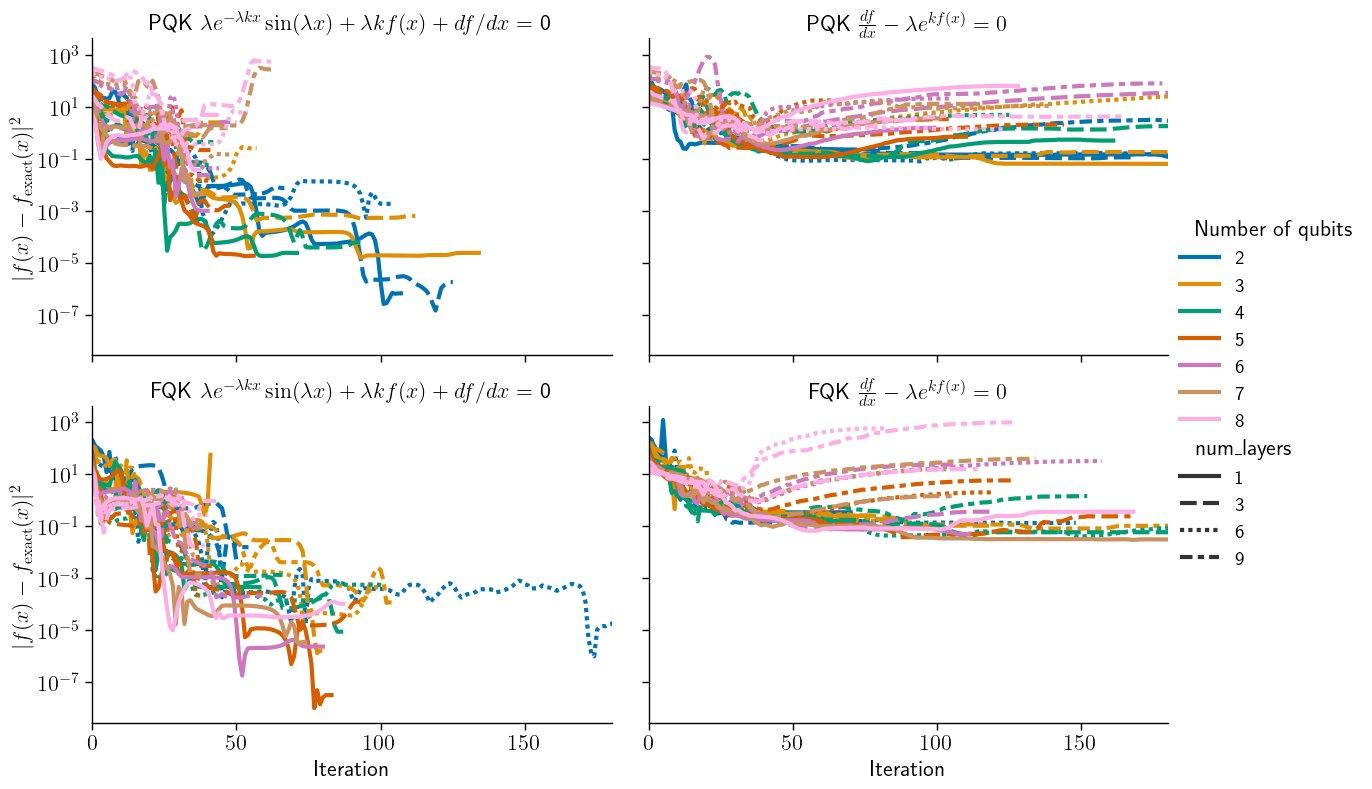

In [7]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})

#result kernels FQK and PQK
results_kernels = results[results["method"] != "QNN"]
palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results_kernels,
                kind="line", 
                col="loss_name", 
                row="method",
                hue="Number of qubits",
                style="num_layers",
                height=4,  # Adjust the height as needed
                aspect=1.5,  
                palette=palette,
                linewidth=3
                )

g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

#leg = g._legend
#leg.set_frame_on(True)

plt.xlim(0, 180)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_32356\389156241.py:12: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g = sns.relplot(x="Iteration", y=mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

MemoryError: Unable to allocate 1.53 GiB for an array with shape (24, 8557570) and data type object

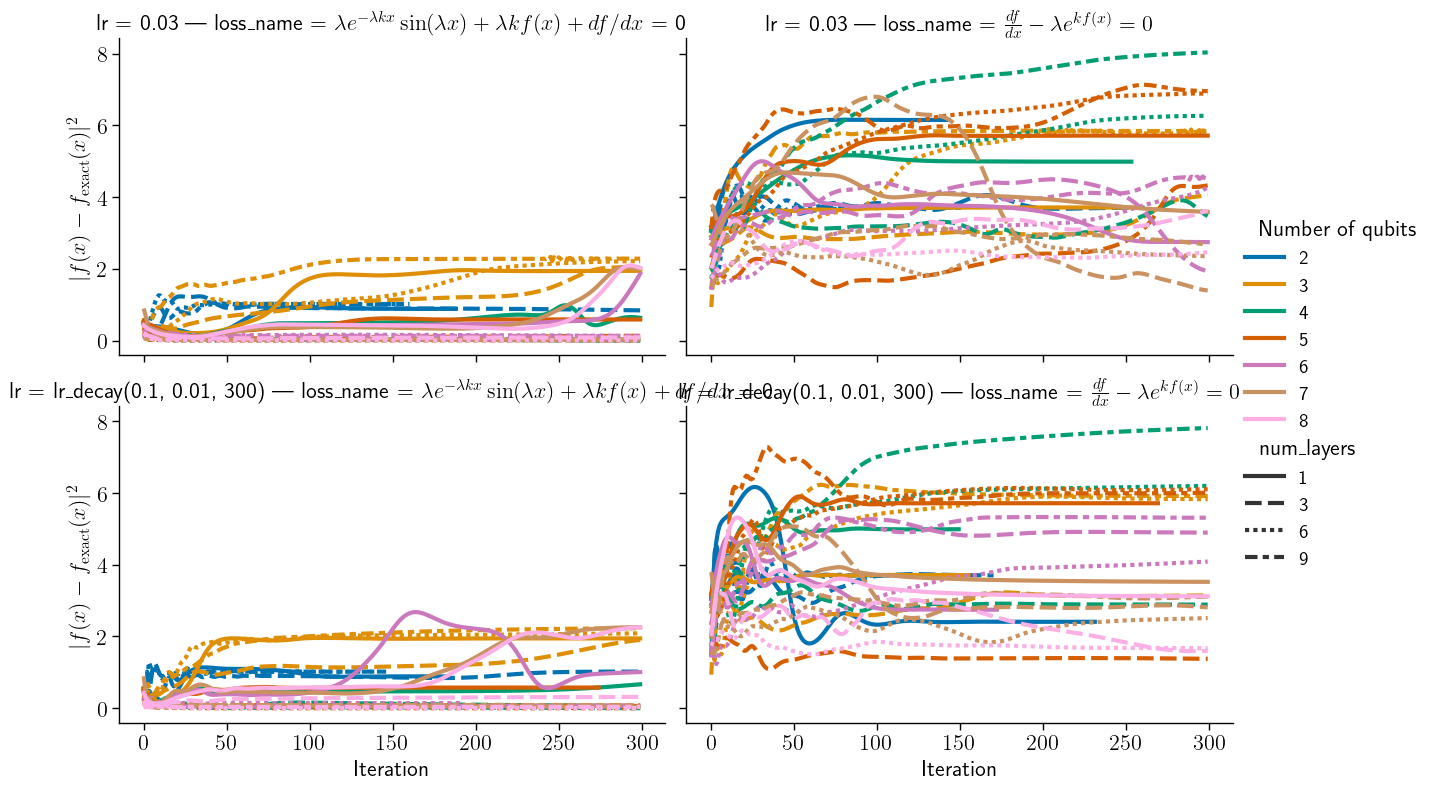

In [ ]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})

#result kernels FQK and PQK
results_QNNs = results[results["method"] == "QNN"]
results_QNNs = results_QNNs[results_QNNs["Number of qubits"] == 8]

results_QNNs = results_QNNs[results_QNNs["boundary_handling"] == "floating"]
palette = sns.color_palette("colorblind", 10)

g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results_QNNs,
                kind="line", 
                col="loss_name", 
                row="lr",
                hue="floating",
                style="num_layers",
                height=4,  # Adjust the height as needed
                aspect=1.5,  
                palette=palette,
                linewidth=3
                )

g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

#leg = g._legend
#leg.set_frame_on(True)

plt.yscale("log")
plt.xlim(0, 180)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\3121740591.py:10: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g = sns.relplot(x="Iteration", y=loss_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

(0.0, 180.0)

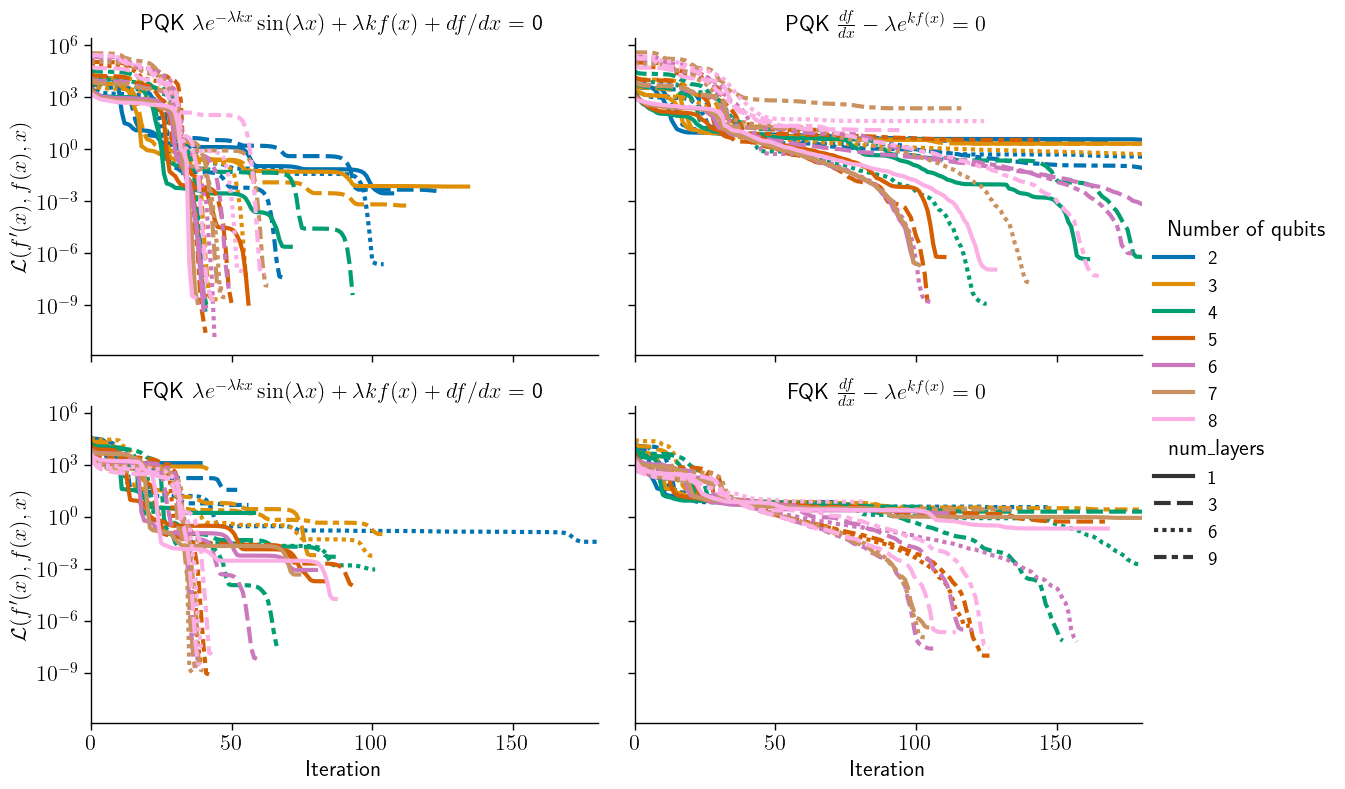

In [9]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})

#result kernels FQK and PQK
results_kernels = results[results["method"] != "QNN"]
palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=loss_history_str, 
                data=results_kernels,
                kind="line", 
                col="loss_name", 
                row="method",
                hue="Number of qubits",
                style="num_layers",
                height=4,  # Adjust the height as needed
                aspect=1.5,  
                palette=palette,
                linewidth=3
                )

g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

#leg = g._legend
#leg.set_frame_on(True)

plt.xlim(0, 180)


In [10]:
#results with method = QNN
results_QNN = results[results["method"] == "QNN"]
results_Kernels = results[results["method"] != "QNN"]

results_QNN["min " + mse_history_str] = results_QNN.groupby(["method", "loss_name", "num_qubits", "num_layers", "lr", "boundary_handling"])["mse_history"].transform("min")
results_QNN["min " + loss_history_str] = results_QNN.groupby(["method", "loss_name", "num_qubits", "num_layers", "lr", "boundary_handling"])["loss_history"].transform("min")

results_Kernels["min " + mse_history_str] = results_Kernels.groupby(["method", "loss_name", "num_qubits", "num_layers",])["mse_history"].transform("min")
results_Kernels["min " + loss_history_str] = results_Kernels.groupby(["method", "loss_name", "num_qubits", "num_layers",])["loss_history"].transform("min")



filtering_columns_QNN = ["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str, "boundary_handling", "lr"]
mse_df_QNN = results_QNN[["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str, "boundary_handling", "lr", "f_sol", "domain", "loss_history_cp", "mse_history_cp"]].drop_duplicates(subset=filtering_columns_QNN).rename(columns={"min " + mse_history_str: "min_loss"})
mse_df_QNN["Type of Loss"] = mse_history_str

filtering_columns_QNN = ["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str, "boundary_handling", "lr"]
true_loss_df_QNN = results_QNN[["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str, "boundary_handling", "lr", "f_sol", "domain",  "loss_history_cp", "mse_history_cp"]].drop_duplicates(subset=filtering_columns_QNN).rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df_QNN["Type of Loss"] = loss_history_str

filtering_columns_Kernel = ["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str]
mse_df_Kernels = results_Kernels[["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str, "f_sol", "domain", "loss_history_cp", "mse_history_cp"]].drop_duplicates(subset=filtering_columns_Kernel).rename(columns={"min " + mse_history_str: "min_loss"})
mse_df_Kernels["Type of Loss"] = mse_history_str

filtering_columns_Kernel = ["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str]
true_loss_df_Kernels = results_Kernels[["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str, "f_sol", "domain", "loss_history_cp", "mse_history_cp"]].drop_duplicates(subset=filtering_columns_Kernel).rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df_Kernels["Type of Loss"] = loss_history_str


combined_df = pd.concat([mse_df_QNN, true_loss_df_QNN, mse_df_Kernels, true_loss_df_Kernels])
#rename min_loss to Loss

combined_df = combined_df.rename(columns={"min_loss": "Loss"})
combined_df = combined_df.rename(columns={"method": "Method"})
combined_df = combined_df.rename(columns={"Number of qubits": "Qubits"})
combined_df = combined_df.rename(columns={"loss_name": "DE:"})
combined_df = combined_df.rename(columns={"num_layers": "Layers"})

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\4122878100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_QNN["min " + mse_history_str] = results_QNN.groupby(["method", "loss_name", "num_qubits", "num_layers", "lr", "boundary_handling"])["mse_history"].transform("min")
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\4122878100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_QNN["min " + loss_history_str] = results_QNN.groupby(["method", "loss_name", "num_qubits", "num_layers", "

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\2958969557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\2958969557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\2958969557.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

(1e-12, 100.0)

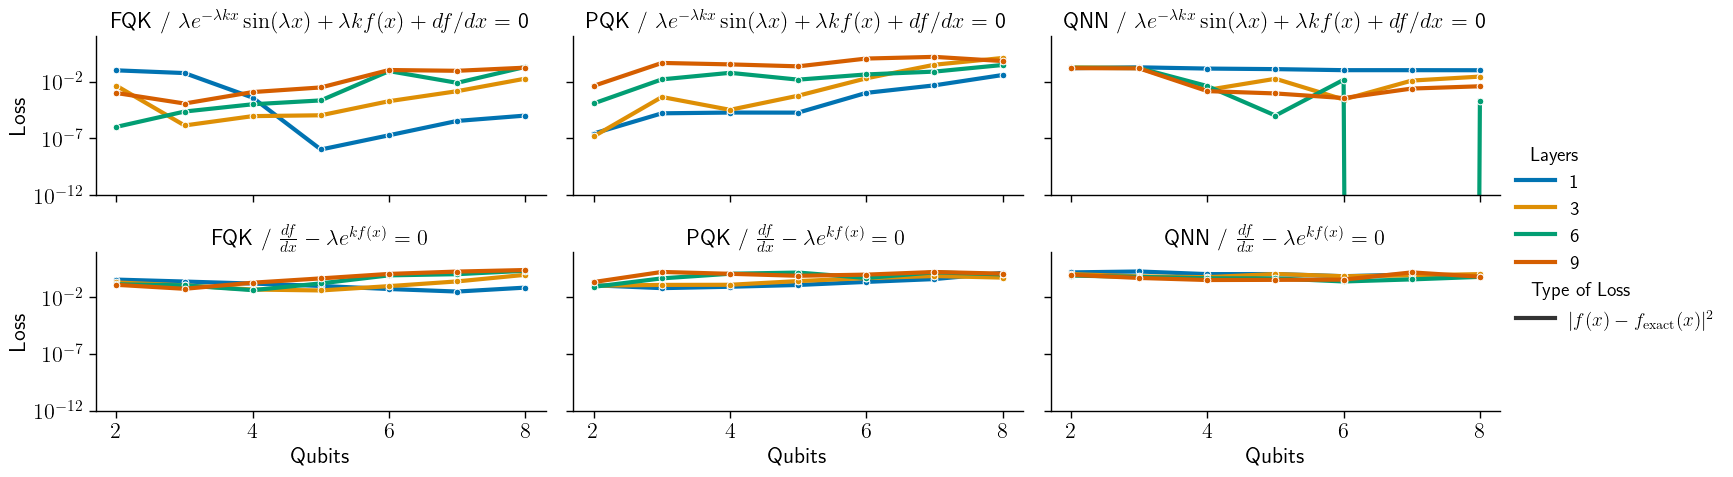

In [11]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)


g = sns.relplot(x="Qubits", y="Loss",
                data=best_mse_loss,
                kind="line", 
                col="Method", 
                col_order=["FQK", "PQK", "QNN"],
                hue="Layers",
                style="Type of Loss",
                row="DE:",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(yscale="log")


#leg = g._legend

plt.ylim(1e-12, 1e2)


#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\3393807650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\3393807650.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\3393807650.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

(1e-12, 10000.0)

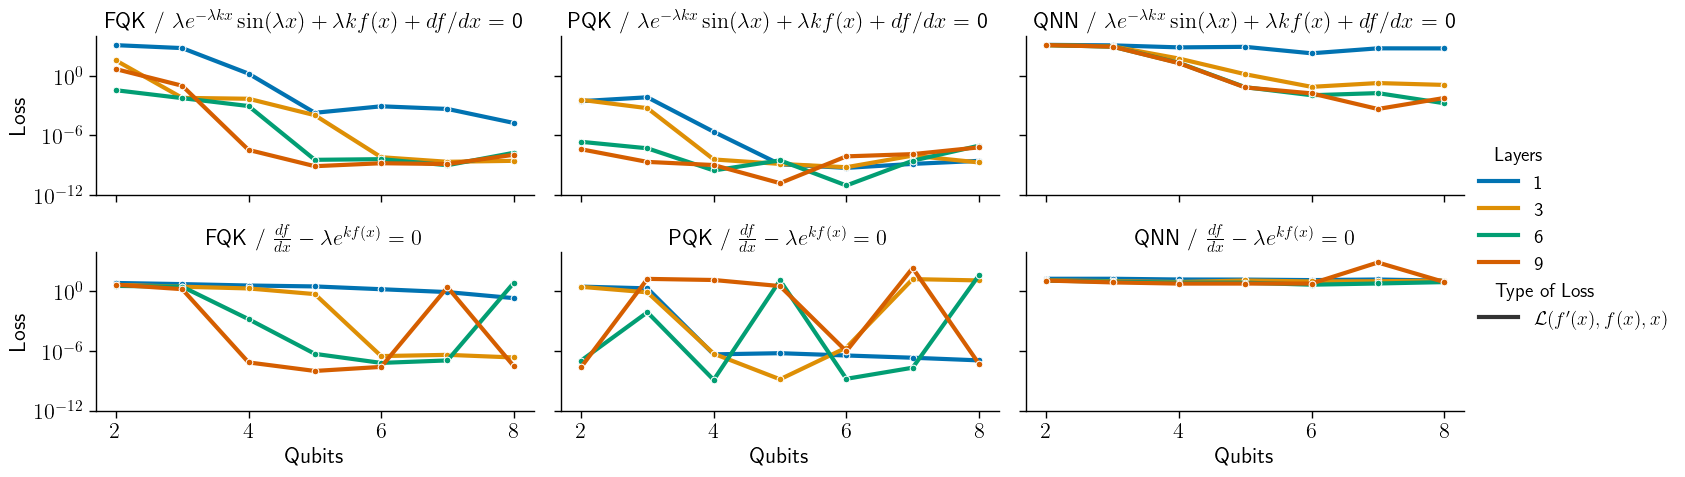

In [12]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers"], inplace=True)


g = sns.relplot(x="Qubits", y="Loss",
                data=best_loss_loss,
                kind="line", 
                col="Method", 
                col_order=["FQK", "PQK", "QNN"],
                hue="Layers",
                style="Type of Loss",
                row="DE:",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(yscale="log")


#leg = g._legend

plt.ylim(1e-12, 1e4)


#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\399244026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\399244026.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  best_mse_loss = best_mse_loss.fillna("Unnecessary")
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\399244026.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

(1e-12, 1000000.0)

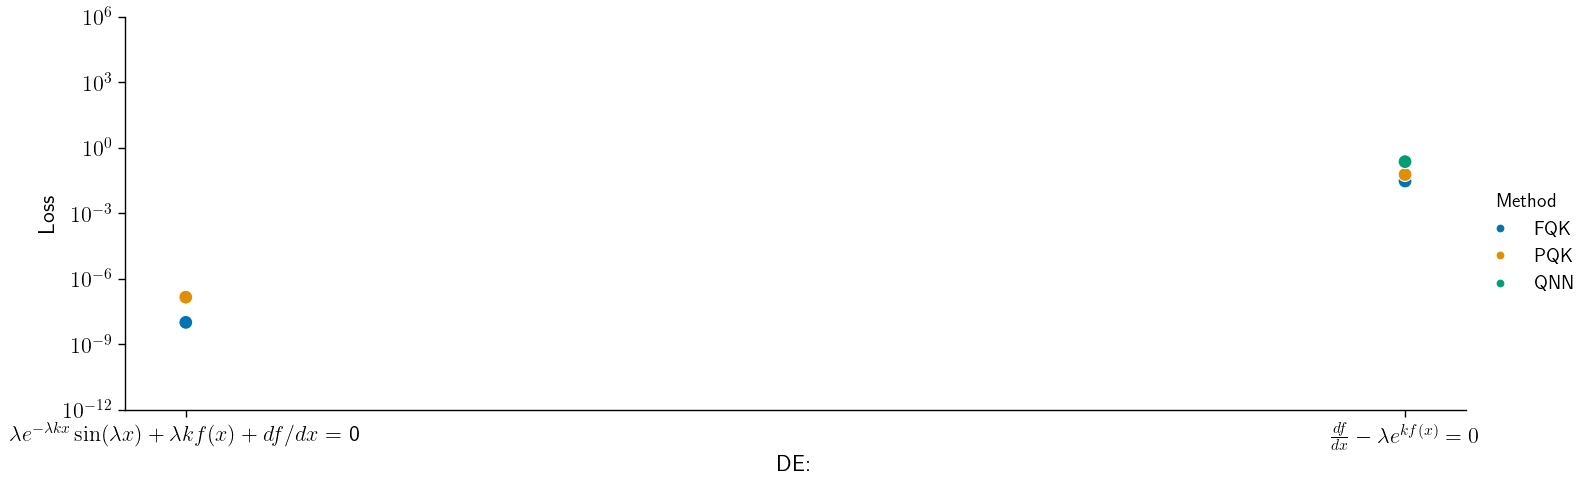

In [13]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss = best_mse_loss.fillna("Unnecessary")

best_mse_loss.drop_duplicates(subset=["Method", "DE:"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:"], inplace=True)




g = sns.relplot(x="DE:", y="Loss",
                data=best_mse_loss,
                kind="scatter", 
                hue="Method",
                hue_order=["FQK", "PQK", "QNN"],
                height=5,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                s=100
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(yscale="log")


#leg = g._legend

plt.ylim(1e-12, 1e6)


#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

In [18]:
best_mse_loss["Loss"].loc[29]

1.0268515868631179e-08

In [14]:
best_mse_loss

,Method,DE:,Qubits,Layers,Loss,boundary_handling,lr,f_sol,domain,loss_history_cp,mse_history_cp,Type of Loss
205,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,7,6,0.000000e+00,floating,"lr_decay(0.1, 0.01, 300)","[1.0, 0.7465901845077743, 0.26757421951491156,...","[0.0, 0.03103448275862069, 0.06206896551724138...","[2335.6313, 930.11641, 389.28864, 378.49793, 2...","[0.21441, 0.08689, 0.03877, 0.04621, 0.05485, ...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
29,FQK,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,5,1,1.026852e-08,Unnecessary,Unnecessary,"[0.9999167292266868, 0.7641630933793628, 0.285...","[0.0, 0.03103448275862069, 0.06206896551724138...","[13666.916274836596, 8781.67978895721, 7862.28...","[59.34110231707851, 13.327215213214874, 8.8478...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
1,PQK,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,2,3,1.464064e-07,Unnecessary,Unnecessary,"[1.0004731100147206, 0.7659043242081902, 0.286...","[0.0, 0.03103448275862069, 0.06206896551724138...","[17730.663497320238, 11801.681442325007, 10450...","[84.94571275007114, 23.896375750870114, 15.747...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
108,FQK,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,7,1,3.059802e-02,Unnecessary,Unnecessary,"[-3.8002792490560644, -2.9061694406051863, -2....","[0.01, 0.0406896551724138, 0.07137931034482758...","[2384.1056765471403, 1478.2430122033854, 1135....","[44.969550550494745, 23.44710551641973, 18.774...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
26,PQK,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,3,1,6.100873e-02,Unnecessary,Unnecessary,"[-3.4351078744845225, -2.7457017689075656, -2....","[0.01, 0.0406896551724138, 0.07137931034482758...","[3375.637879045463, 2289.206305593888, 1813.71...","[57.548875085649605, 29.358660060598673, 23.34...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
94,QNN,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,6,6,2.366600e-01,pinned,0.03,"[-2.5205738784494724, -2.188492387135982, -1.9...","[0.01, 0.0406896551724138, 0.07137931034482758...","[871.1477, 386.45516, 196.08446, 152.5819, 152...","[2.29919, 2.43929, 2.56423, 2.58138, 2.56762, ...",$|f(x)-f_{\mathrm{exact}}(x)|^2$


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\954438102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\954438102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:",], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7008\954438102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

NameError: name 'df' is not defined

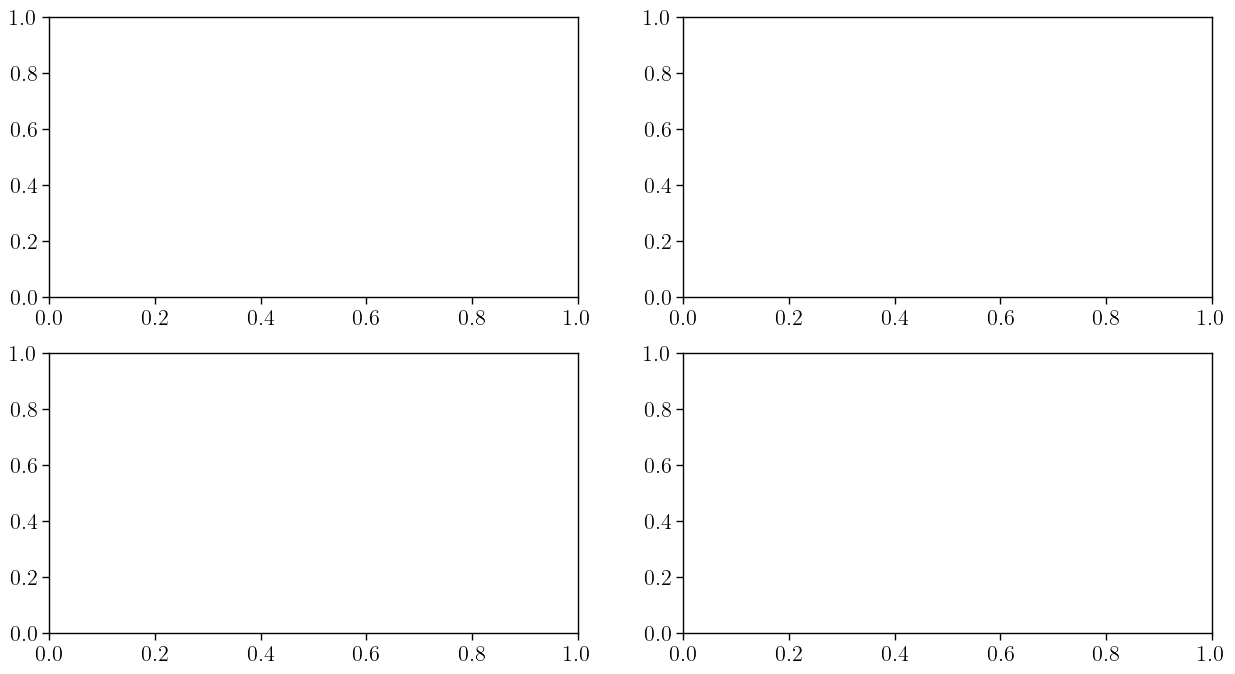

In [15]:
#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:",], inplace=True)
best_mse_loss.sort_values("Method", inplace=True)



f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, best_mse_loss["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 1, 100))

true_solution_array = [odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 0.9, 30)),  
                       odeint(mapping_of_derivatives_of_loss_functions["log_ode"], np.log(0.01), best_mse_loss["domain"].iloc[0])]



#let us plot the predictions of the best method 

fig, axs = plt.subplots(2, len(best_mse_loss["DE:"].unique()) , figsize=(15, 8))

for j, de_name in enumerate(best_mse_loss["DE:"].unique()):
    axs[0, j].plot(df["domain"].iloc[0], true_solution_array[j], "o", label="f(x)", c="black")
    for m, method in enumerate(["FQK", "PQK", "QNN"]):
        df = best_mse_loss[(best_mse_loss["Method"] == method) & (best_mse_loss["DE:"] == de_name)]
        axs[0, j].plot(df["domain"].iloc[0], df["f_sol"].iloc[0], label=method, c=palette[m])
        axs[0, j].set_title(de_name)
        axs[0, j].set_xlabel("x")
        axs[0, j].set_ylabel("f(x)")

        axs[1, j].plot(df["mse_history_cp"].iloc[0], label=method, c=palette[m], linestyle="--")
        axs[1, j].set_yscale("log")
        axs[1, j].set_xlabel("Iteration")
        axs[1, j].set_ylabel("MSE")



     
axs[0,0].legend()
plt.suptitle("Best solvers of the DEs")


In [ ]:
best_mse_loss

,Method,DE:,Qubits,Layers,Loss,boundary_handling,lr,f_sol,domain,Type of Loss
205,QNN,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,7,6,0.0,floating,"lr_decay(0.1, 0.01, 300)","[1.0, 0.7465901845077743, 0.26757421951491156,...","[0.0, 0.03103448275862069, 0.06206896551724138...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
29,FQK,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,5,1,0.0,NaN,NaN,"[0.9999167292266868, 0.7641630933793628, 0.285...","[0.0, 0.03103448275862069, 0.06206896551724138...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
1,PQK,$\lambda e^{-\lambda k x} \sin(\lambda x) + \l...,2,3,0.0,NaN,NaN,"[1.0004731100147206, 0.7659043242081902, 0.286...","[0.0, 0.03103448275862069, 0.06206896551724138...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
108,FQK,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,7,1,0.030598,NaN,NaN,"[-3.8002792490560644, -2.9061694406051863, -2....","[0.01, 0.0406896551724138, 0.07137931034482758...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
26,PQK,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,3,1,0.061009,NaN,NaN,"[-3.4351078744845225, -2.7457017689075656, -2....","[0.01, 0.0406896551724138, 0.07137931034482758...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
94,QNN,$\frac{df}{dx} - \lambda e^{kf(x)} = 0$,6,6,0.23666,pinned,0.03,"[-2.5205738784494724, -2.188492387135982, -1.9...","[0.01, 0.0406896551724138, 0.07137931034482758...",$|f(x)-f_{\mathrm{exact}}(x)|^2$
